In [342]:
import numpy as np
import matplotlib.pyplot as plt

In [343]:
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

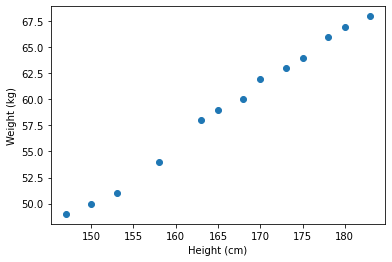

In [344]:
plt.plot(X, y, 'o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [346]:
Xbar = np.hstack((np.ones((X.shape[0], 1)), X))

In [347]:
def compute_cost(theta, X, y):
    return np.sum(1/2 * ((X @ theta - y) ** 2))

In [348]:
def sgd(theta, X, y, learning_rate, iter_counts):
    J_history = []
    m = len(y)
    for i in range(iter_counts):
        X = np.random.permutation(X)
        for dt_i in range(m):
            theta = theta - learning_rate * (X[dt_i, np.newaxis].T @ ((X[dt_i, np.newaxis] @ theta) - y[dt_i, np.newaxis]))
        J_history.append(compute_cost(theta, X, y))
        print('Epoch {}/{}: Loss {} => {}'.format(i + 1, iter_counts, J_history[-2] if len(J_history) > 1 else 'None', J_history[-1]))
    return theta, J_history

In [349]:
init_theta = np.zeros((Xbar.shape[1], 1))

In [365]:
theta, J_history = sgd(init_theta, Xbar, y, 0.0000001, 100)
theta

Epoch 1/100: Loss None => 21528.749641684924
Epoch 2/100: Loss 21528.749641684924 => 20057.491629365275
Epoch 3/100: Loss 20057.491629365275 => 18670.935264913187
Epoch 4/100: Loss 18670.935264913187 => 17404.466223658503
Epoch 5/100: Loss 17404.466223658503 => 16197.478200393896
Epoch 6/100: Loss 16197.478200393896 => 15087.119342651189
Epoch 7/100: Loss 15087.119342651189 => 14096.170640927654
Epoch 8/100: Loss 14096.170640927654 => 13115.705348077805
Epoch 9/100: Loss 13115.705348077805 => 12271.3974248088
Epoch 10/100: Loss 12271.3974248088 => 11439.911391552561
Epoch 11/100: Loss 11439.911391552561 => 10647.194580509535
Epoch 12/100: Loss 10647.194580509535 => 9919.980494704881
Epoch 13/100: Loss 9919.980494704881 => 9259.765822056106
Epoch 14/100: Loss 9259.765822056106 => 8608.217193741366
Epoch 15/100: Loss 8608.217193741366 => 8062.932941574552
Epoch 16/100: Loss 8062.932941574552 => 7496.904883165493
Epoch 17/100: Loss 7496.904883165493 => 7020.801631204518
Epoch 18/100: Loss

array([[0.00210581],
       [0.34574099]])

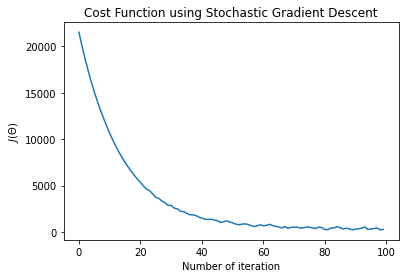

In [367]:
plt.plot(J_history)
plt.xlabel('Number of iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost Function using Stochastic Gradient Descent')
plt.show()

[[0.00210581]
 [0.34574099]]


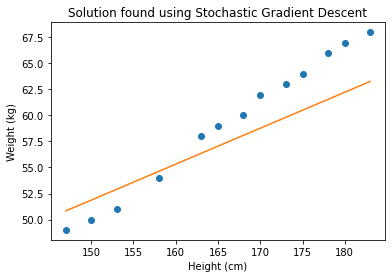

In [371]:
x0 = np.linspace(min(X), max(X), 2)
y0 = theta[0][0] + x0 * theta[1][0]
plt.plot(X, y, 'o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Solution found using Stochastic Gradient Descent')
plt.plot(x0, y0)
print(theta)
plt.show()